In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import dataset

In [2]:
train_data = pd.read_excel(r"C:\Users\Sourima\Desktop\Python\Data_Train.xlsx")

In [3]:
train_data.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218


In [4]:
train_data.tail(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


Missing Values

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
train_data[train_data['Total_Stops'].isnull()]


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [8]:
train_data.dropna(inplace=True)

In [9]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [11]:
train_data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 7.2 MB


Lets Perform Data Pre-process & extract Derived attributes from "Date_of_Journey"  lets extract derived attributes from "Date_of_Journey" & fetch day , month , year !

In [12]:
data = train_data.copy()

In [13]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [14]:
def change_into_Datetime(col):
    data[col] = pd.to_datetime(data[col])

In [15]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [16]:
for feature in ['Dep_Time', 'Arrival_Time' , 'Date_of_Journey']:
    change_into_Datetime(feature)

C:\Users\Sourima\AppData\Local\Temp\ipykernel_22224\2042782518.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[col] = pd.to_datetime(data[col])
C:\Users\Sourima\AppData\Local\Temp\ipykernel_22224\2042782518.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[col] = pd.to_datetime(data[col])
C:\Users\Sourima\AppData\Local\Temp\ipykernel_22224\2042782518.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data[col] = pd.to_datetime(data[col])


In [17]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [18]:
data['Journey_day'] = data['Date_of_Journey'].dt.day

In [19]:
data['Journey_month'] = data['Date_of_Journey'].dt.month

In [20]:
data['Journey_year'] = data['Date_of_Journey'].dt.year

In [21]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-03-28 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-03-28 05:50:00,2024-03-28 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-03-28 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019


cleaning of  Dep_Time & Arrival_Time & then extract Derived attributes

In [22]:
def extract_hour_min(df , col):
    df[col+"_hour"] = df[col].dt.hour
    df[col+"_minute"] = df[col].dt.minute
    return df.head(3)
    


In [23]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month',
       'Journey_year'],
      dtype='object')

In [24]:
extract_hour_min(data , "Dep_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-03-28 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-03-28 05:50:00,2024-03-28 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-03-28 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25


In [25]:
extract_hour_min(data , "Arrival_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-03-28 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-03-28 05:50:00,2024-03-28 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-03-28 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


In [26]:
cols_to_drop = ['Arrival_Time' , "Dep_Time"]

data.drop(cols_to_drop , axis=1 , inplace=True )

In [27]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


In [28]:
data.shape

(10682, 16)

Analyse when will most of the flights take-off

In [29]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute'],
      dtype='object')

In [30]:
def flight_dep_time(x):
    
    if (x>4) and (x<=8):
        return "Early Morning"
    
    elif (x>8) and (x<=12):
        return "Morning"
    
    elif (x>12) and (x<=16):
        return "Noon"
    
    elif (x>16) and (x<=20):
        return "Evening"
    
    elif (x>20) and (x<=24):
        return "Night"
    
    else:
        return "late night"

<Axes: xlabel='Dep_Time_hour'>

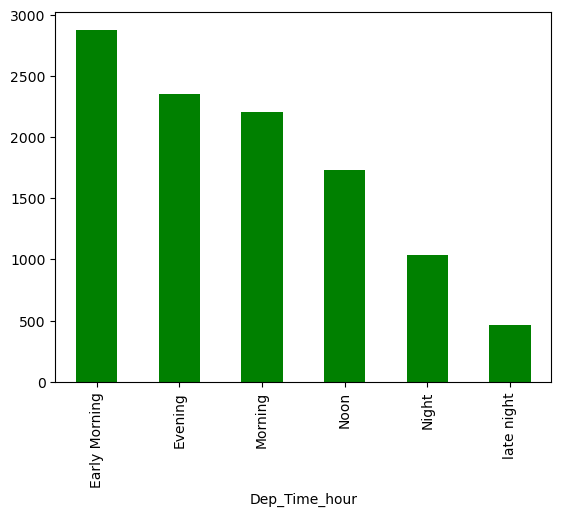

In [31]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind="bar" , color="g")

In [32]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts()



Dep_Time_hour
Early Morning    2880
Evening          2357
Morning          2209
Noon             1731
Night            1040
late night        465
Name: count, dtype: int64

In [33]:
##!pip install plotly
##!pip install chart_studio


In [34]:
##!pip install cufflinks

In [35]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import plot , iplot , init_notebook_mode , download_plotlyjs
init_notebook_mode(connected=True)
cf.go_offline()


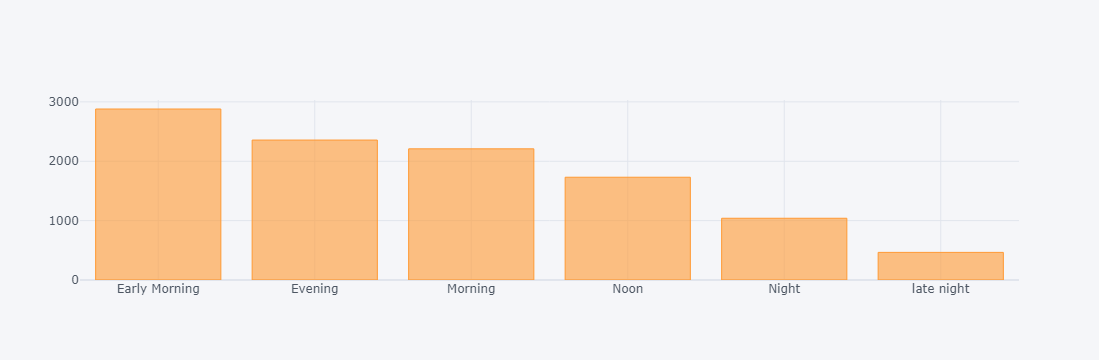

In [36]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().iplot(kind="bar")

Pre-process Duration Feature & extract meaningful features from it.

In [37]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


In [38]:
def preprocess_duration(x):
    if 'h' not in x:
        x = '0h' + ' ' + x
    elif 'm' not in x:
        x = x + ' ' +'0m'
        
    return x



In [39]:
data['Duration'] = data['Duration'].apply(preprocess_duration)

In [40]:
data['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [41]:
data['Duration'][0]

'2h 50m'

In [42]:
'2h 50m'.split(' ')

['2h', '50m']

In [43]:
'2h 50m'.split(' ')[0]

'2h'

In [44]:
'2h 50m'.split(' ')[0][0:-1]

'2'

In [45]:
int('2h 50m'.split(' ')[1][0:-1])

50

In [46]:
data['Duration_hours'] = data['Duration'].apply(lambda x : int(x.split(' ')[0][0:-1]))

In [47]:
data['Duration_mins'] = data['Duration'].apply(lambda x : int(x.split(' ')[1][0:-1]))

In [48]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25


In [49]:
pd.to_timedelta(data["Duration"]).dt.components.hours

0         2
1         7
2        19
3         5
4         4
         ..
10678     2
10679     2
10680     3
10681     2
10682     8
Name: hours, Length: 10682, dtype: int64

In [50]:
data["Duration_hour"] = pd.to_timedelta(data["Duration"]).dt.components.hours

In [51]:
data["Duration_minute"] = pd.to_timedelta(data["Duration"]).dt.components.minutes

In [52]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_hour,Duration_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25,7,25


Lets Analyse whether Duration impacts Price or not

In [53]:
data['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [54]:
2*60

120

In [55]:
eval('2*60')

120

In [56]:
data['Duration_total_mins'] = data['Duration'].str.replace('h' ,"*60").str.replace(' ' , '+').str.replace('m' , "*1").apply(eval)

In [57]:
data['Duration_total_mins']

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration_total_mins, Length: 10682, dtype: int64

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

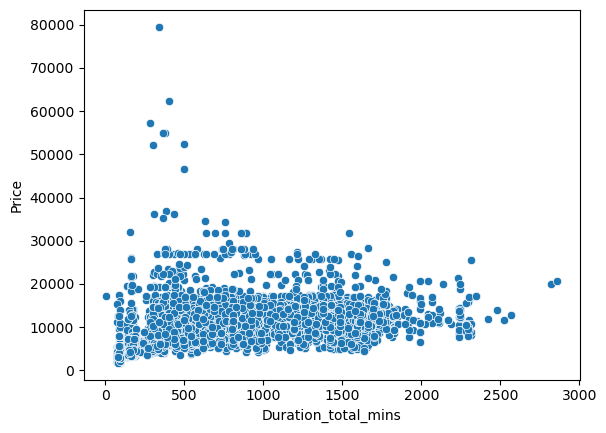

In [58]:
sns.scatterplot(x="Duration_total_mins" , y="Price" , data=data)

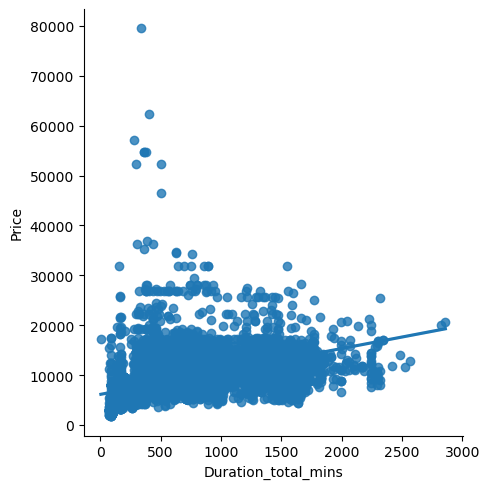

In [59]:
sns.lmplot(x="Duration_total_mins" , y="Price" , data=data)

### pretty clear that As the duration of minutes increases Flight price also increases.|

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

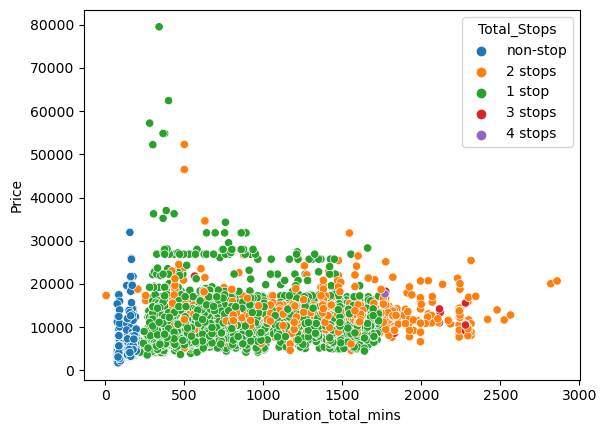

In [60]:
sns.scatterplot(x="Duration_total_mins" , y="Price" , hue="Total_Stops", data=data)

In [61]:
'''
Non stops flights take less duration while their fare is also low, then as the stop increases, 
duration also increases and price also increases(in most of the cases)

'''

'\nNon stops flights take less duration while their fare is also low, then as the stop increases, \nduration also increases and price also increases(in most of the cases)\n\n'

On which route jet airways is extremely used?

In [62]:
data['Airline']=='Jet Airways'

0        False
1        False
2         True
3        False
4        False
         ...  
10678    False
10679    False
10680     True
10681    False
10682    False
Name: Airline, Length: 10682, dtype: bool

In [63]:
data[data['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

Performing airline vs price analysis

In [64]:
data.columns


Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_hour', 'Duration_minute',
       'Duration_total_mins'],
      dtype='object')

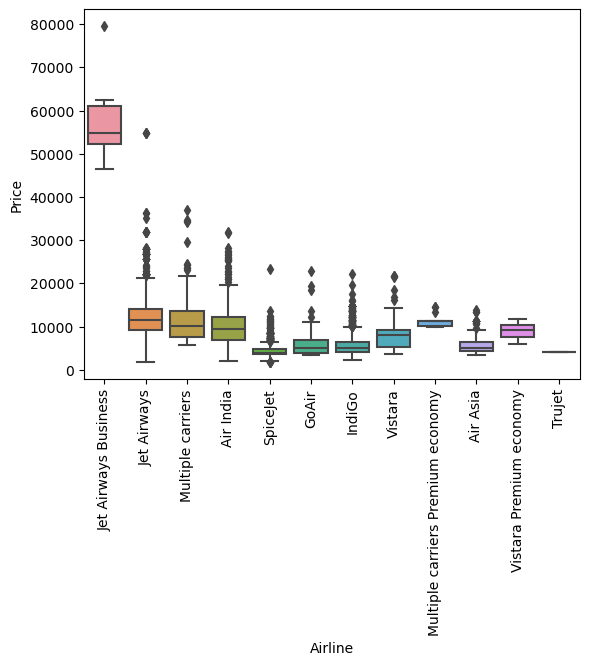

In [65]:
sns.boxplot(y='Price' , x='Airline' , data=data.sort_values('Price' , ascending=False))
plt.xticks(rotation="vertical")
plt.show()

In [66]:
'''

Conclusion--> From graph we can see that Jet Airways Business have the highest Price., 
              Apart from the first Airline almost all are having similar median

'''

'\n\nConclusion--> From graph we can see that Jet Airways Business have the highest Price., \n              Apart from the first Airline almost all are having similar median\n\n'

Applying one-hot encoding on data

In [67]:
data.head(2)


,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_hour,Duration_minute,Duration_total_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,2019,22,20,1,10,2,50,2,50,170
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,2019,5,50,13,15,7,25,7,25,445


In [68]:
cat_col = [col for col in data.columns if data[col].dtype=="object"]

In [69]:
num_col = [col for col in data.columns if data[col].dtype!="object"]

In [70]:
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [71]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [72]:
data['Source'].apply(lambda x : 1 if x=='Banglore' else 0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [73]:
for sub_category in data['Source'].unique():
    data['Source_'+sub_category] = data['Source'].apply(lambda x : 1 if x==sub_category else 0)

In [74]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Duration_hours,Duration_mins,Duration_hour,Duration_minute,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,2,50,2,50,170,1,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,7,25,7,25,445,0,1,0,0,0
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,19,0,19,0,1140,0,0,1,0,0


 Performing target guided encoding on Data

In [75]:
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [76]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Duration_hours,Duration_mins,Duration_hour,Duration_minute,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,2,50,2,50,170,1,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,7,25,7,25,445,0,1,0,0,0


In [77]:
data['Airline'].nunique()

12

In [78]:
data.groupby(['Airline'])['Price'].mean().sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9612.427756
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

In [79]:
airlines = data.groupby(['Airline'])['Price'].mean().sort_values().index

In [80]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [81]:
dict_airlines = {key:index for index , key in enumerate(airlines , 0)}

In [82]:
dict_airlines

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [83]:
data['Airline'] = data['Airline'].map(dict_airlines)

In [84]:
data['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [85]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Duration_hours,Duration_mins,Duration_hour,Duration_minute,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,2,50,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,7,25,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,19,0,19,0,1140,0,0,1,0,0


In [86]:
### Lets perform Target Guided Mean encoding on 'Destination' ..

In [87]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [88]:
data['Destination'].replace('New Delhi' , 'Delhi' , inplace=True)

In [89]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [90]:
dest = data.groupby(['Destination'])['Price'].mean().sort_values().index

In [91]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [92]:
dict_dest = {key:index for index , key in enumerate(dest , 0)}

In [93]:
dict_dest

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [94]:
data['Destination'] = data['Destination'].map(dict_dest)

In [95]:
data['Destination']

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10682, dtype: int64

In [96]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Duration_hours,Duration_mins,Duration_hour,Duration_minute,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,2,50,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,7,25,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,19,0,19,0,1140,0,0,1,0,0


Perform Label(Manual) Encoding on Data

In [97]:
data['Total_Stops']

0        non-stop
1         2 stops
2         2 stops
3          1 stop
4          1 stop
           ...   
10678    non-stop
10679    non-stop
10680    non-stop
10681    non-stop
10682     2 stops
Name: Total_Stops, Length: 10682, dtype: object

In [98]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [99]:
stop = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [100]:
data['Total_Stops'] = data['Total_Stops'].map(stop)

In [101]:
data['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

Remove Un-necessary features

In [102]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Duration_hours,Duration_mins,Duration_hour,Duration_minute,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,...,2,50,2,50,170,1,0,0,0,0


In [103]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_hour', 'Duration_minute',
       'Duration_total_mins', 'Source_Banglore', 'Source_Kolkata',
       'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [104]:
data['Additional_Info'].value_counts()/len(data)*100

# Additional_Info contains almost 80% no_info,so we can drop this column

Additional_Info
No info                         78.112713
In-flight meal not included     18.554578
No check-in baggage included     2.995694
1 Long layover                   0.177869
Change airports                  0.065531
Business class                   0.037446
No Info                          0.028085
1 Short layover                  0.009362
Red-eye flight                   0.009362
2 Long layover                   0.009362
Name: count, dtype: float64

In [105]:
data.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Duration_hours,Duration_mins,Duration_hour,Duration_minute,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,...,2,50,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,...,7,25,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2,No info,13882,9,...,19,0,19,0,1140,0,0,1,0,0
3,3,2019-05-12,Kolkata,3,CCU → NAG → BLR,5h 25m,1,No info,6218,12,...,5,25,5,25,325,0,1,0,0,0


In [106]:
data['Journey_year'].unique()

array([2019])

In [107]:
'''

lets drop Date_of_Journey as well as we have already extracted "Journey_hour" , "jpuney_month" , Journey_day"..
Additional_Info contains almost 80% no_info , so we can drop this column ..
lets drop Duration_total_mins as we have already extracted "Duration_hours" & "Duration_mins"
Lets drop "Source" feature as well as we have already perform feature encoding on this Feature 
lets drop Journey_year as well , as it has constant values throughtout dataframe which is 2019..

'''

'\n\nlets drop Date_of_Journey as well as we have already extracted "Journey_hour" , "jpuney_month" , Journey_day"..\nAdditional_Info contains almost 80% no_info , so we can drop this column ..\nlets drop Duration_total_mins as we have already extracted "Duration_hours" & "Duration_mins"\nLets drop "Source" feature as well as we have already perform feature encoding on this Feature \nlets drop Journey_year as well , as it has constant values throughtout dataframe which is 2019..\n\n'

In [108]:
data.drop(columns=['Date_of_Journey' , 'Additional_Info' , 'Duration_total_mins' , 'Source' , 'Journey_year'] , axis=1 , inplace=True)

In [109]:
data.columns

Index(['Airline', 'Destination', 'Route', 'Duration', 'Total_Stops', 'Price',
       'Journey_day', 'Journey_month', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_hour', 'Duration_minute', 'Source_Banglore',
       'Source_Kolkata', 'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [110]:
data.head(4)

,Airline,Destination,Route,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,...,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_hour,Duration_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,BLR → DEL,2h 50m,0,3897,24,3,22,20,...,10,2,50,2,50,1,0,0,0,0
1,7,3,CCU → IXR → BBI → BLR,7h 25m,2,7662,1,5,5,50,...,15,7,25,7,25,0,1,0,0,0
2,10,4,DEL → LKO → BOM → COK,19h 0m,2,13882,9,6,9,25,...,25,19,0,19,0,0,0,1,0,0
3,3,3,CCU → NAG → BLR,5h 25m,1,6218,12,5,18,5,...,30,5,25,5,25,0,1,0,0,0


In [111]:
data.drop(columns=['Route'] , axis=1 , inplace=True)

## we can drop Route as well bcz Route is directly related to Total stops & considering 2 same features doesnt make sense while building ML model..

In [112]:
data.head(3)

,Airline,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_hour,Duration_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,2h 50m,0,3897,24,3,22,20,1,10,2,50,2,50,1,0,0,0,0
1,7,3,7h 25m,2,7662,1,5,5,50,13,15,7,25,7,25,0,1,0,0,0
2,10,4,19h 0m,2,13882,9,6,9,25,4,25,19,0,19,0,0,0,1,0,0


In [113]:
data.drop(columns=['Duration'] , axis=1 , inplace=True)

## we can drop "Duration" feature as we have extracted "Duration hour" & "Duration Minute"..

In [114]:
data.head(3)

,Airline,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_hour,Duration_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897,24,3,22,20,1,10,2,50,2,50,1,0,0,0,0
1,7,3,2,7662,1,5,5,50,13,15,7,25,7,25,0,1,0,0,0
2,10,4,2,13882,9,6,9,25,4,25,19,0,19,0,0,0,1,0,0


Lets Perform outlier detection

In [115]:
def plot(df, col):
    fig , (ax1 , ax2 , ax3) = plt.subplots(3,1)
    
    sns.distplot(df[col] , ax=ax1)
    sns.boxplot(df[col] , ax=ax2)
    sns.distplot(df[col] , ax=ax3 , kde=False)

C:\Users\Sourima\AppData\Local\Temp\ipykernel_22224\1916289185.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Sourima\AppData\Local\Temp\ipykernel_22224\1916289185.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to u

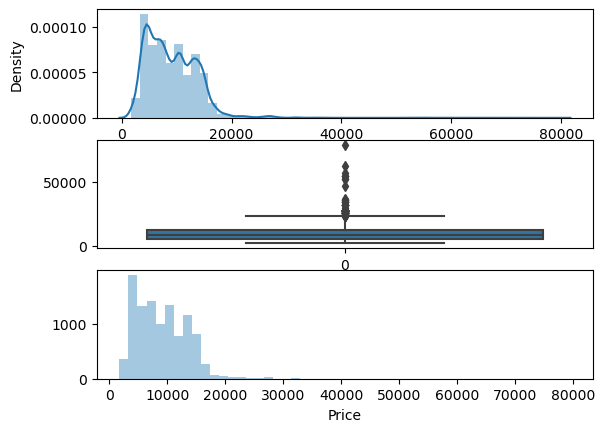

In [116]:
plot(data , 'Price')

In [117]:
q1 = data['Price'].quantile(0.25)
q3 = data['Price'].quantile(0.75)

iqr = q3- q1

maximum = q3 + 1.5*iqr
minimum = q1 - 1.5*iqr

In [118]:
print(maximum)

23017.0


In [119]:
print(minimum)

-5367.0


In [120]:
print([price for price in data['Price'] if price> maximum or price<minimum])

[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


In [121]:
len([price for price in data['Price'] if price> maximum or price<minimum])

94

How to deal with outliers

In [122]:
### wherever I have price >35K just replace replace it with median of Price

data['Price'] = np.where(data['Price']>=35000 , data['Price'].median() , data['Price'])

C:\Users\Sourima\AppData\Local\Temp\ipykernel_22224\1916289185.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Sourima\AppData\Local\Temp\ipykernel_22224\1916289185.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to u

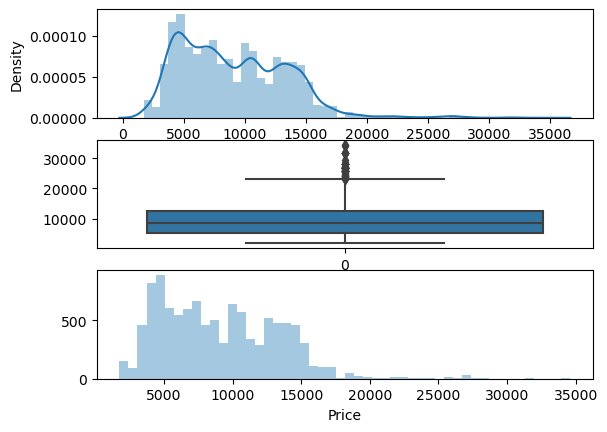

In [123]:
plot(data , 'Price')

Lets perform feature selection

In [124]:
data.head(2) 

,Airline,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_hour,Duration_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897.0,24,3,22,20,1,10,2,50,2,50,1,0,0,0,0
1,7,3,2,7662.0,1,5,5,50,13,15,7,25,7,25,0,1,0,0,0


In [125]:
X = data.drop(['Price'] , axis=1)

In [126]:
y = data['Price']

In [127]:
from sklearn.feature_selection import mutual_info_regression

In [128]:
imp = mutual_info_regression(X , y)

In [129]:
imp

array([0.96744113, 1.00231804, 0.79172072, 0.23063578, 0.63249909,
       0.32519359, 0.26025667, 0.39943455, 0.3519681 , 0.46032981,
       0.34309193, 0.42689548, 0.34698365, 0.39092154, 0.44851696,
       0.52349514, 0.13513311, 0.2106419 ])

In [130]:
imp_df = pd.DataFrame(imp , index=X.columns)

In [131]:
imp_df.columns = ['importance']

In [132]:
imp_df

,importance
Airline,0.967441
Destination,1.002318
Total_Stops,0.791721
Journey_day,0.230636
Journey_month,0.632499
Dep_Time_hour,0.325194
Dep_Time_minute,0.260257
Arrival_Time_hour,0.399435
Arrival_Time_minute,0.351968
Duration_hours,0.460330


In [133]:
imp_df.sort_values(by='importance' , ascending=False)

,importance
Destination,1.002318
Airline,0.967441
Total_Stops,0.791721
Journey_month,0.632499
Source_Delhi,0.523495
Duration_hours,0.460330
Source_Kolkata,0.448517
Duration_hour,0.426895
Arrival_Time_hour,0.399435
Source_Banglore,0.390922


Lets Build ML model

split dataset into train & test

In [134]:
from sklearn.model_selection import train_test_split

In [135]:
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.25, random_state=42)

In [136]:
from sklearn.ensemble import RandomForestRegressor

In [137]:
ml_model = RandomForestRegressor()

In [138]:
ml_model.fit(X_train , y_train)

RandomForestRegressor()

In [139]:
y_pred = ml_model.predict(X_test)

In [140]:
y_pred

array([16825.93,  5523.07,  8859.47, ...,  3528.19,  6491.55,  6893.88])

In [141]:
from sklearn import metrics

In [142]:
metrics.r2_score(y_test , y_pred)

0.8125436900911804

 Lets Save model

In [143]:
!pip install pickle

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [144]:
import pickle

In [145]:
# open a file, where you want to store the data
file = open(r'C:\Users\Sourima\Desktop\Python\Test_set.xlsx' , 'wb')

In [146]:
# dump information to that file
pickle.dump(ml_model , file)

In [147]:
model = open(r'C:\Users\Sourima\Desktop\Python\Test_set.xlsx' , 'rb')

In [148]:
forest = pickle.load(model)

In [149]:
y_pred2 = forest.predict(X_test)

In [150]:
metrics.r2_score(y_test , y_pred2)

0.8125436900911804

Automate ml pipeline & How to define your Evaluation metric..

 a.. Making our own metric.

In [151]:
def mape(y_true , y_pred):
    y_true , y_pred = np.array(y_true) , np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [152]:
mape(y_test , y_pred)

13.127597632600747

b..Automating ml pipeline !

In [153]:
from sklearn import metrics

In [154]:
def predict(ml_model):
    model = ml_model.fit(X_train , y_train)
    print('Training score : {}'.format(model.score(X_train , y_train)))
    y_predection = model.predict(X_test)
    print('predictions are : {}'.format(y_predection))
    print('\n')
    r2_score = metrics.r2_score(y_test , y_predection)
    print('r2 score : {}'.format(r2_score))
    print('MAE : {}'.format(metrics.mean_absolute_error(y_test , y_predection)))
    print('MSE : {}'.format(metrics.mean_squared_error(y_test , y_predection)))
    print('RMSE : {}'.format(np.sqrt(metrics.mean_squared_error(y_test , y_predection))))
    print('MAPE : {}'.format(mape(y_test , y_predection)))
    sns.distplot(y_test - y_predection)

Training score : 0.9516341021534802
predictions are : [16799.33  5400.34  8770.24 ...  3541.42  6273.27  6874.33]


r2 score : 0.809777860608251
MAE : 1182.5242175024837
MSE : 3703168.457180219
RMSE : 1924.361831148243
MAPE : 13.25903719504343


C:\Users\Sourima\AppData\Local\Temp\ipykernel_22224\2529260170.py:13: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



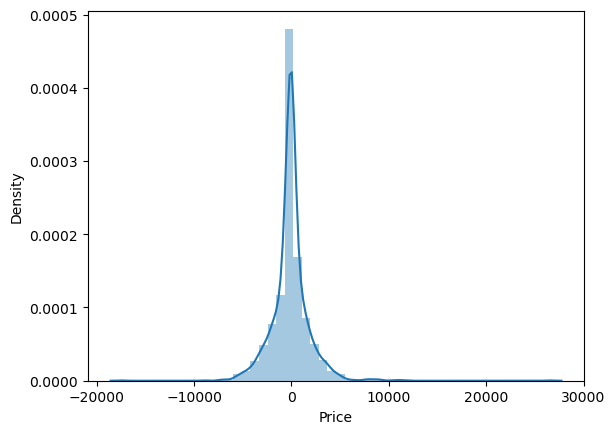

In [155]:
predict(RandomForestRegressor())

In [156]:
from sklearn.tree import DecisionTreeRegressor

Training score : 0.966591628243878
predictions are : [16840.  4959.  8085. ...  3419.  5797.  6442.]


r2 score : 0.6779542041505611
MAE : 1417.0474229377264
MSE : 6269458.627531719
RMSE : 2503.8887011070838
MAPE : 15.596252777546491


C:\Users\Sourima\AppData\Local\Temp\ipykernel_22224\2529260170.py:13: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



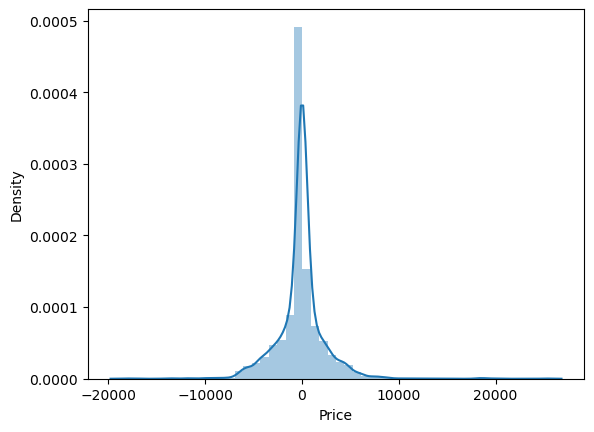

In [157]:
predict(DecisionTreeRegressor())

Hypertune ml model

Hyperparameter Tuning or Hyperparameter Optimization

In [158]:
from sklearn.model_selection import RandomizedSearchCV

In [159]:
### initialise estimator
reg_rf = RandomForestRegressor()

In [160]:
np.linspace(start =100 , stop=1200 , num=6)

array([ 100.,  320.,  540.,  760.,  980., 1200.])

In [161]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start =100 , stop=1200 , num=6)]

# Number of features to consider at every split
max_features = ["auto", "sqrt"]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start =5 , stop=30 , num=4)]

# Minimum number of samples required to split a node
min_samples_split = [5,10,15,100]


In [162]:
# Create the random grid or hyper-parameter space

random_grid = {
    'n_estimators' : n_estimators , 
    'max_features' : max_features , 
    'max_depth' : max_depth , 
    'min_samples_split' : min_samples_split
}

In [163]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [164]:
## Define searching

# Random search of parameters, using 3 fold cross validation
# search across 576 different combinations


rf_random = RandomizedSearchCV(estimator=reg_rf , param_distributions=random_grid , cv=3 , n_jobs=-1 , verbose=2)

In [165]:
rf_random.fit(X_train , y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [169]:
rf_random.best_params_

{'n_estimators': 760,
 'min_samples_split': 5,
 'max_features': 'auto',
 'max_depth': 13}

In [167]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=13, max_features='auto', min_samples_split=5,
                      n_estimators=760)

In [168]:
rf_random.best_score_

0.8158139496148094